# **Preprocessing Steps**

**Drive Connection**

In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# to show current working directory
!pwd 
!ls
%cd drive/MyDrive/Google_colab
!ls

/content
drive  sample_data
/content/drive/MyDrive/Google_colab
Colab_notebooks  Preprocessing.ipynb


**Importing Required Libraries**

In [18]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

**Path of Spectrograms**

In [19]:
path = '/content/drive/MyDrive/Google_colab/Colab_notebooks'

**GrayScale - Resize - Normalization**

In [20]:
%%time

X_data = []
y_data = []

for subdir, dirs, files in os.walk(path):
    for file in files:
        pic = cv2.imread(os.path.join(subdir, file))
        pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
        pic = cv2.resize(pic, (32, 32))
        
        X_data.append(pic)
        y_data.append(int(subdir[-1]))

X = np.array(X_data) / 255
y = np.array(y_data).reshape(-1, 1)

print(X.shape)
print(y.shape)

(8732, 32, 32)
(8732, 1)
CPU times: user 38.6 s, sys: 5.45 s, total: 44.1 s
Wall time: 54.9 s


**Example to Control**

In [21]:
print(X[0:2])
print(y[0:2])

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.02745098 0.00784314 ... 0.07058824 0.06666667 0.07058824]
  [0.         0.09803922 0.11764706 ... 0.13333333 0.0627451  0.14901961]
  ...
  [0.04705882 0.51764706 0.59215686 ... 0.62745098 0.5372549  0.5372549 ]
  [0.09803922 0.74509804 0.6745098  ... 0.77647059 0.75686275 0.61176471]
  [0.05098039 0.43137255 0.57647059 ... 0.74901961 0.66666667 0.65098039]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.02745098 0.01176471 0.02745098 ... 0.03137255 0.14901961 0.08627451]
  [0.00392157 0.02352941 0.03529412 ... 0.09019608 0.15686275 0.1372549 ]
  ...
  [0.41176471 0.46666667 0.38823529 ... 0.43921569 0.52941176 0.34117647]
  [0.60784314 0.74117647 0.68235294 ... 0.67058824 0.75686275 0.61568627]
  [0.43921569 0.57647059 0.4627451  ... 0.72941176 0.47058824 0.56470588]]]
[[0]
 [0]]


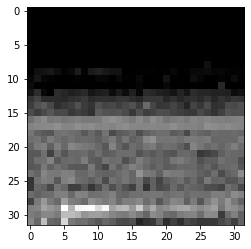

(32, 32)


In [22]:
plt.imshow(X[100],cmap="gray")
plt.show()

print(X[100].shape)

**Train - Test and Validation Datasets**

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")

print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")

print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")


X_train: 6112
y_train: 6112
X_val: 1310
y_val: 1310
X_test: 1310
y_test: 1310


**Saving Train - Test and Validation Datasets**

In [24]:
pathnew= '/content/drive/MyDrive/Google_colab'

np.save(os.path.join(pathnew,'X_train'), X_train)
np.save(os.path.join(pathnew,'y_train'), y_train)

np.save(os.path.join(pathnew,'X_val'), X_val)
np.save(os.path.join(pathnew,'y_val'), y_val)

np.save(os.path.join(pathnew,'X_test'), X_test)
np.save(os.path.join(pathnew,'y_test'), y_test)